In [1]:
import pandas as pd #used for data manipulation
import numpy as np #used for numerical analysis
from collections import Counter as c # return counts of number of classess
import matplotlib.pyplot as plt #used for data Visualization
import seaborn as sns #data visualization library
import missingno as msno #finding missing values
from sklearn.metrics import accuracy_score, confusion_matrix#model performance
from sklearn.model_selection import train_test_split #splits data in random train and test array
from sklearn.preprocessing import LabelEncoder #encoding the levels of categorical features
from sklearn.linear_model import LogisticRegression #Classification ML algorithm
import pickle #Python object hterarchy is converted into a byte stream,

In [2]:
data=pd.read_csv("kidney_disease.csv") #loading the csv data
y =pd.read_csv("kidney_disease.csv")['classification']
data.head() #return you the first 5 rows values

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
y

0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: classification, Length: 400, dtype: object

In [4]:
data.columns #return all the column names

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
data.columns=['id','age','blood_pressure','specific_gravity','albumin',
              'sugar','red_blood_cell','pus_cell','pus_cell_clumps','bacteria',
              'blood glucose random','blood_urea','serum_creatinine','sodium','potassium',
              'hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count',
              'hypertension','diabetesmellitus','coronary_artery_disease','appetite',
              'pedal_edema','anemia','class'] # monually giving the name of tha columns
data.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cell', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [6]:
data.info() #info will give you a summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cell           248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [7]:
data.isnull().any() #it will return true if any columns is having null values

id                         False
age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cell              True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood glucose random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [8]:
data['blood glucose random'].fillna(data['blood glucose random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)

data['potassium'].fillna(data['potassium'].mean(),inplace=True)

data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)


In [9]:
data.keys()

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cell', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [10]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cell'].fillna(data['red_blood_cell'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)

In [11]:
 pd.get_dummies(data)

,id,age,blood_pressure,specific_gravity,albumin,sugar,blood glucose random,blood_urea,serum_creatinine,sodium,...,coronary_artery_disease_yes,appetite_good,appetite_poor,pedal_edema_no,pedal_edema_yes,anemia_no,anemia_yes,class_ckd,class_ckd\t,class_notckd
0,0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,...,0,1,0,1,0,1,0,1,0,0
1,1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,...,0,1,0,1,0,1,0,1,0,0
2,2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,...,0,0,1,1,0,0,1,1,0,0
3,3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,...,0,0,1,0,1,0,1,1,0,0
4,4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,...,0,1,0,1,0,1,0,0,0,1
396,396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,...,0,1,0,1,0,1,0,0,0,1
397,397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,...,0,1,0,1,0,1,0,0,0,1
398,398,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,...,0,1,0,1,0,1,0,0,0,1


In [12]:
# catcols=set(data.dtype[data.dtype=='0'].index.values)
# print(catcols)

In [13]:
for i in data:
    print("Columns :",data)
    print(c(data)) #using counter for checking the number of classess in the column
    print('*'*120+'\n')

Columns :       id   age  blood_pressure  specific_gravity  albumin  sugar  \
0      0  48.0            80.0             1.020      1.0    0.0   
1      1   7.0            50.0             1.020      4.0    0.0   
2      2  62.0            80.0             1.010      2.0    3.0   
3      3  48.0            70.0             1.005      4.0    0.0   
4      4  51.0            80.0             1.010      2.0    0.0   
..   ...   ...             ...               ...      ...    ...   
395  395  55.0            80.0             1.020      0.0    0.0   
396  396  42.0            70.0             1.025      0.0    0.0   
397  397  12.0            80.0             1.020      0.0    0.0   
398  398  17.0            60.0             1.025      0.0    0.0   
399  399  58.0            80.0             1.025      0.0    0.0   

    red_blood_cell  pus_cell pus_cell_clumps    bacteria  ...  \
0           normal    normal      notpresent  notpresent  ...   
1           normal    normal      notpresen

Columns :       id   age  blood_pressure  specific_gravity  albumin  sugar  \
0      0  48.0            80.0             1.020      1.0    0.0   
1      1   7.0            50.0             1.020      4.0    0.0   
2      2  62.0            80.0             1.010      2.0    3.0   
3      3  48.0            70.0             1.005      4.0    0.0   
4      4  51.0            80.0             1.010      2.0    0.0   
..   ...   ...             ...               ...      ...    ...   
395  395  55.0            80.0             1.020      0.0    0.0   
396  396  42.0            70.0             1.025      0.0    0.0   
397  397  12.0            80.0             1.020      0.0    0.0   
398  398  17.0            60.0             1.025      0.0    0.0   
399  399  58.0            80.0             1.025      0.0    0.0   

    red_blood_cell  pus_cell pus_cell_clumps    bacteria  ...  \
0           normal    normal      notpresent  notpresent  ...   
1           normal    normal      notpresen

Columns :       id   age  blood_pressure  specific_gravity  albumin  sugar  \
0      0  48.0            80.0             1.020      1.0    0.0   
1      1   7.0            50.0             1.020      4.0    0.0   
2      2  62.0            80.0             1.010      2.0    3.0   
3      3  48.0            70.0             1.005      4.0    0.0   
4      4  51.0            80.0             1.010      2.0    0.0   
..   ...   ...             ...               ...      ...    ...   
395  395  55.0            80.0             1.020      0.0    0.0   
396  396  42.0            70.0             1.025      0.0    0.0   
397  397  12.0            80.0             1.020      0.0    0.0   
398  398  17.0            60.0             1.025      0.0    0.0   
399  399  58.0            80.0             1.025      0.0    0.0   

    red_blood_cell  pus_cell pus_cell_clumps    bacteria  ...  \
0           normal    normal      notpresent  notpresent  ...   
1           normal    normal      notpresen

Columns :       id   age  blood_pressure  specific_gravity  albumin  sugar  \
0      0  48.0            80.0             1.020      1.0    0.0   
1      1   7.0            50.0             1.020      4.0    0.0   
2      2  62.0            80.0             1.010      2.0    3.0   
3      3  48.0            70.0             1.005      4.0    0.0   
4      4  51.0            80.0             1.010      2.0    0.0   
..   ...   ...             ...               ...      ...    ...   
395  395  55.0            80.0             1.020      0.0    0.0   
396  396  42.0            70.0             1.025      0.0    0.0   
397  397  12.0            80.0             1.020      0.0    0.0   
398  398  17.0            60.0             1.025      0.0    0.0   
399  399  58.0            80.0             1.025      0.0    0.0   

    red_blood_cell  pus_cell pus_cell_clumps    bacteria  ...  \
0           normal    normal      notpresent  notpresent  ...   
1           normal    normal      notpresen

In [14]:
# data.remove('red_blood_cell_count') # remove is used for removing a particular column
# data.remove('packed_cell_volume')
# data.remove('white_blood_cell_count')
# print(data)

In [15]:
catcols

NameError: name 'catcols' is not defined

In [16]:
# 'specific_gravity','albumin','sugar'(as these columns are numerical it is removed)
catcols=['anemia ','pedal_edema','appetite','bacteria','class','coronary_artery_disease','diabetesmellit','hypertension','pus_cell','pus_cell_clumps','red_blood_cells'] #only considered the text class columns

In [17]:
from sklearn.preprocessing import LabelEncoder #imorting the LabelEncoding from sklearn
for i in catcols:  #Looping through all the categorical columns
    print("LABEL ENCODING OF:",data)
    LE:('data') = LabelEncoder() # creating an object of labelEncoder
    print(c(data)) #getting the classes values before transformation
    LE:('data').fit_transform('data') #transforming ourtext classes to numerical values
    print(c(data)) #getting the classes values after transformation
    print("*"*100)

LABEL ENCODING OF:       id   age  blood_pressure  specific_gravity  albumin  sugar  \
0      0  48.0            80.0             1.020      1.0    0.0   
1      1   7.0            50.0             1.020      4.0    0.0   
2      2  62.0            80.0             1.010      2.0    3.0   
3      3  48.0            70.0             1.005      4.0    0.0   
4      4  51.0            80.0             1.010      2.0    0.0   
..   ...   ...             ...               ...      ...    ...   
395  395  55.0            80.0             1.020      0.0    0.0   
396  396  42.0            70.0             1.025      0.0    0.0   
397  397  12.0            80.0             1.020      0.0    0.0   
398  398  17.0            60.0             1.025      0.0    0.0   
399  399  58.0            80.0             1.025      0.0    0.0   

    red_blood_cell  pus_cell pus_cell_clumps    bacteria  ...  \
0           normal    normal      notpresent  notpresent  ...   
1           normal    normal      

AttributeError: 'str' object has no attribute 'fit_transform'

In [18]:
controls=set(data.dtypes[data.dtypes!='0'].index.values)# only fetech the float and int type columns
#controls=pd.DataFrame(data,columns=controls)
print(controls)

{'bacteria', 'class', 'pedal_edema', 'serum_creatinine', 'diabetesmellitus', 'potassium', 'albumin', 'age', 'blood_pressure', 'blood glucose random', 'hypertension', 'appetite', 'pus_cell_clumps', 'packed_cell_volume', 'coronary_artery_disease', 'specific_gravity', 'hemoglobin', 'id', 'red_blood_cell_count', 'blood_urea', 'pus_cell', 'sugar', 'sodium', 'anemia', 'red_blood_cell', 'white_blood_cell_count'}


In [19]:
for i in data:
    print("Continous Columns :",data)
    print(c(data))
    print('*'*120+'\n')

Continous Columns :       id   age  blood_pressure  specific_gravity  albumin  sugar  \
0      0  48.0            80.0             1.020      1.0    0.0   
1      1   7.0            50.0             1.020      4.0    0.0   
2      2  62.0            80.0             1.010      2.0    3.0   
3      3  48.0            70.0             1.005      4.0    0.0   
4      4  51.0            80.0             1.010      2.0    0.0   
..   ...   ...             ...               ...      ...    ...   
395  395  55.0            80.0             1.020      0.0    0.0   
396  396  42.0            70.0             1.025      0.0    0.0   
397  397  12.0            80.0             1.020      0.0    0.0   
398  398  17.0            60.0             1.025      0.0    0.0   
399  399  58.0            80.0             1.025      0.0    0.0   

    red_blood_cell  pus_cell pus_cell_clumps    bacteria  ...  \
0           normal    normal      notpresent  notpresent  ...   
1           normal    normal     

Continous Columns :       id   age  blood_pressure  specific_gravity  albumin  sugar  \
0      0  48.0            80.0             1.020      1.0    0.0   
1      1   7.0            50.0             1.020      4.0    0.0   
2      2  62.0            80.0             1.010      2.0    3.0   
3      3  48.0            70.0             1.005      4.0    0.0   
4      4  51.0            80.0             1.010      2.0    0.0   
..   ...   ...             ...               ...      ...    ...   
395  395  55.0            80.0             1.020      0.0    0.0   
396  396  42.0            70.0             1.025      0.0    0.0   
397  397  12.0            80.0             1.020      0.0    0.0   
398  398  17.0            60.0             1.025      0.0    0.0   
399  399  58.0            80.0             1.025      0.0    0.0   

    red_blood_cell  pus_cell pus_cell_clumps    bacteria  ...  \
0           normal    normal      notpresent  notpresent  ...   
1           normal    normal     

Continous Columns :       id   age  blood_pressure  specific_gravity  albumin  sugar  \
0      0  48.0            80.0             1.020      1.0    0.0   
1      1   7.0            50.0             1.020      4.0    0.0   
2      2  62.0            80.0             1.010      2.0    3.0   
3      3  48.0            70.0             1.005      4.0    0.0   
4      4  51.0            80.0             1.010      2.0    0.0   
..   ...   ...             ...               ...      ...    ...   
395  395  55.0            80.0             1.020      0.0    0.0   
396  396  42.0            70.0             1.025      0.0    0.0   
397  397  12.0            80.0             1.020      0.0    0.0   
398  398  17.0            60.0             1.025      0.0    0.0   
399  399  58.0            80.0             1.025      0.0    0.0   

    red_blood_cell  pus_cell pus_cell_clumps    bacteria  ...  \
0           normal    normal      notpresent  notpresent  ...   
1           normal    normal     

Continous Columns :       id   age  blood_pressure  specific_gravity  albumin  sugar  \
0      0  48.0            80.0             1.020      1.0    0.0   
1      1   7.0            50.0             1.020      4.0    0.0   
2      2  62.0            80.0             1.010      2.0    3.0   
3      3  48.0            70.0             1.005      4.0    0.0   
4      4  51.0            80.0             1.010      2.0    0.0   
..   ...   ...             ...               ...      ...    ...   
395  395  55.0            80.0             1.020      0.0    0.0   
396  396  42.0            70.0             1.025      0.0    0.0   
397  397  12.0            80.0             1.020      0.0    0.0   
398  398  17.0            60.0             1.025      0.0    0.0   
399  399  58.0            80.0             1.025      0.0    0.0   

    red_blood_cell  pus_cell pus_cell_clumps    bacteria  ...  \
0           normal    normal      notpresent  notpresent  ...   
1           normal    normal     

Counter({'id': 1, 'age': 1, 'blood_pressure': 1, 'specific_gravity': 1, 'albumin': 1, 'sugar': 1, 'red_blood_cell': 1, 'pus_cell': 1, 'pus_cell_clumps': 1, 'bacteria': 1, 'blood glucose random': 1, 'blood_urea': 1, 'serum_creatinine': 1, 'sodium': 1, 'potassium': 1, 'hemoglobin': 1, 'packed_cell_volume': 1, 'white_blood_cell_count': 1, 'red_blood_cell_count': 1, 'hypertension': 1, 'diabetesmellitus': 1, 'coronary_artery_disease': 1, 'appetite': 1, 'pedal_edema': 1, 'anemia': 1, 'class': 1})
************************************************************************************************************************

Continous Columns :       id   age  blood_pressure  specific_gravity  albumin  sugar  \
0      0  48.0            80.0             1.020      1.0    0.0   
1      1   7.0            50.0             1.020      4.0    0.0   
2      2  62.0            80.0             1.010      2.0    3.0   
3      3  48.0            70.0             1.005      4.0    0.0   
4      4  51.0        

Continous Columns :       id   age  blood_pressure  specific_gravity  albumin  sugar  \
0      0  48.0            80.0             1.020      1.0    0.0   
1      1   7.0            50.0             1.020      4.0    0.0   
2      2  62.0            80.0             1.010      2.0    3.0   
3      3  48.0            70.0             1.005      4.0    0.0   
4      4  51.0            80.0             1.010      2.0    0.0   
..   ...   ...             ...               ...      ...    ...   
395  395  55.0            80.0             1.020      0.0    0.0   
396  396  42.0            70.0             1.025      0.0    0.0   
397  397  12.0            80.0             1.020      0.0    0.0   
398  398  17.0            60.0             1.025      0.0    0.0   
399  399  58.0            80.0             1.025      0.0    0.0   

    red_blood_cell  pus_cell pus_cell_clumps    bacteria  ...  \
0           normal    normal      notpresent  notpresent  ...   
1           normal    normal     

Continous Columns :       id   age  blood_pressure  specific_gravity  albumin  sugar  \
0      0  48.0            80.0             1.020      1.0    0.0   
1      1   7.0            50.0             1.020      4.0    0.0   
2      2  62.0            80.0             1.010      2.0    3.0   
3      3  48.0            70.0             1.005      4.0    0.0   
4      4  51.0            80.0             1.010      2.0    0.0   
..   ...   ...             ...               ...      ...    ...   
395  395  55.0            80.0             1.020      0.0    0.0   
396  396  42.0            70.0             1.025      0.0    0.0   
397  397  12.0            80.0             1.020      0.0    0.0   
398  398  17.0            60.0             1.025      0.0    0.0   
399  399  58.0            80.0             1.025      0.0    0.0   

    red_blood_cell  pus_cell pus_cell_clumps    bacteria  ...  \
0           normal    normal      notpresent  notpresent  ...   
1           normal    normal     

In [20]:
controls.remove('specific_gravity')
controls.remove('albumin')
controls.remove('sugar')
print(controls)


{'bacteria', 'class', 'pedal_edema', 'serum_creatinine', 'diabetesmellitus', 'potassium', 'age', 'blood_pressure', 'blood glucose random', 'hypertension', 'appetite', 'pus_cell_clumps', 'packed_cell_volume', 'coronary_artery_disease', 'hemoglobin', 'id', 'red_blood_cell_count', 'blood_urea', 'pus_cell', 'sodium', 'anemia', 'red_blood_cell', 'white_blood_cell_count'}


In [21]:
controls.add('red_blood_cell_count') # using add we can add the column
controls.add('packed_cell_volume')
controls.add('white_blood_cell_count')
print(controls)

{'bacteria', 'class', 'pedal_edema', 'serum_creatinine', 'diabetesmellitus', 'potassium', 'age', 'blood_pressure', 'blood glucose random', 'hypertension', 'appetite', 'pus_cell_clumps', 'packed_cell_volume', 'coronary_artery_disease', 'hemoglobin', 'id', 'red_blood_cell_count', 'blood_urea', 'pus_cell', 'sodium', 'anemia', 'red_blood_cell', 'white_blood_cell_count'}


In [22]:
controls.add('anemia')
controls.add('pedal_edema')
controls.add('appetite')
print(controls)

{'bacteria', 'class', 'pedal_edema', 'serum_creatinine', 'diabetesmellitus', 'potassium', 'age', 'blood_pressure', 'blood glucose random', 'hypertension', 'appetite', 'pus_cell_clumps', 'packed_cell_volume', 'coronary_artery_disease', 'hemoglobin', 'id', 'red_blood_cell_count', 'blood_urea', 'pus_cell', 'sodium', 'anemia', 'red_blood_cell', 'white_blood_cell_count'}


In [23]:
data['coronary_artery_disease'] = data.coronary_artery_disease.replace('\tno','no') # replacing\tno wi
c(data['coronary_artery_disease'])

Counter({'no': 366, 'yes': 34})

In [24]:
data['dibetesmellitus'] = data.diabetesmellitus.replace(to_replace={'\tno','no','\tyes','yes','yes'})
c(data['diabetesmellitus'])

Counter({'yes': 134, 'no': 260, ' yes': 1, '\tno': 3, '\tyes': 2})

In [25]:
data.describe() # computes summary values for continous column data

,id,age,blood_pressure,specific_gravity,albumin,sugar,blood glucose random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.675000,76.469072,1.017712,0.90000,0.395000,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.022008,13.476298,0.005434,1.31313,1.040038,74.782634,49.285887,5.617490,9.204273,2.819783,2.716171
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000
50%,199.500000,55.000000,78.234536,1.020000,0.00000,0.000000,126.000000,44.000000,1.400000,137.528754,4.627244,12.526437
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,3.072454,141.000000,4.800000,14.625000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


C:\Users\91763\AppData\Local\Temp\ipykernel_5144\4156840497.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)


<Axes: xlabel='age', ylabel='Density'>

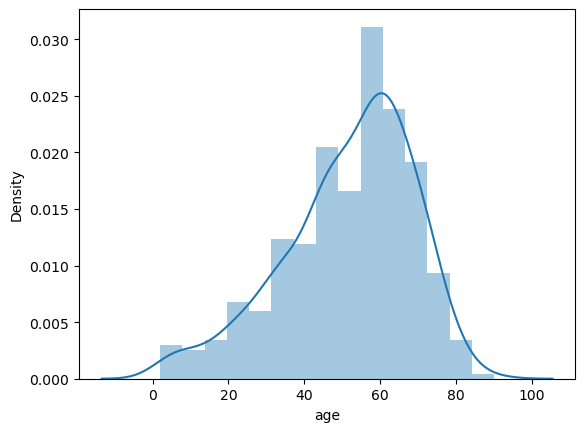

In [26]:
sns.distplot(data.age)

Text(0.5, 1.0, 'age vs blood scatter plot')

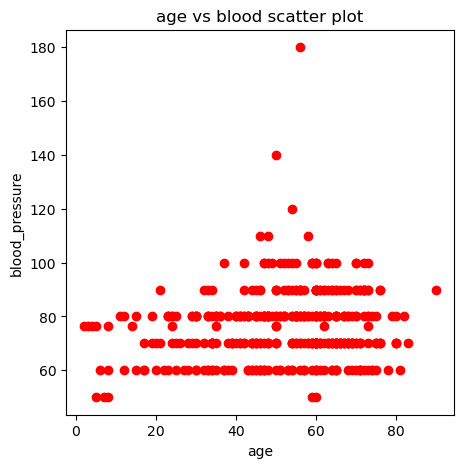

In [27]:
import matplotlib.pyplot as plt # import the matplotlib libaray
fig=plt.figure(figsize=(5,5)) #plot size
plt.scatter(data['age'],data['blood_pressure'],color='red')
plt.xlabel('age') #set the label for x-axis
plt.ylabel('blood_pressure') #set the label for y-axis
plt.title("age vs blood scatter plot") #set a ttle for the axes


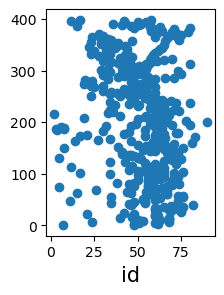

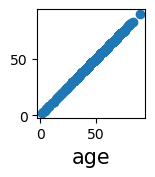

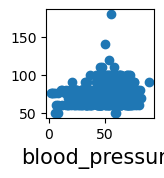

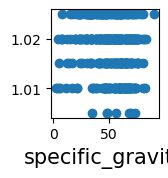

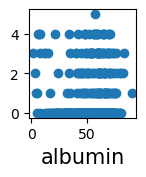

In [28]:
plt.figure(figsize=(10,10), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=5: #as there are 11 continous columns in the data
        ax = plt.subplot(3,4,plotnumber) #3,4 is refeer to3*4 matrix
        plt.scatter(data['age'],data[column]) #plotting scatter plot
        plt.xlabel(column,fontsize=15)
        #plt.ylabel('salary',fontsize=15)
        plotnumber+=1
        plt.show()

C:\Users\91763\AppData\Local\Temp\ipykernel_5144\714693114.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")


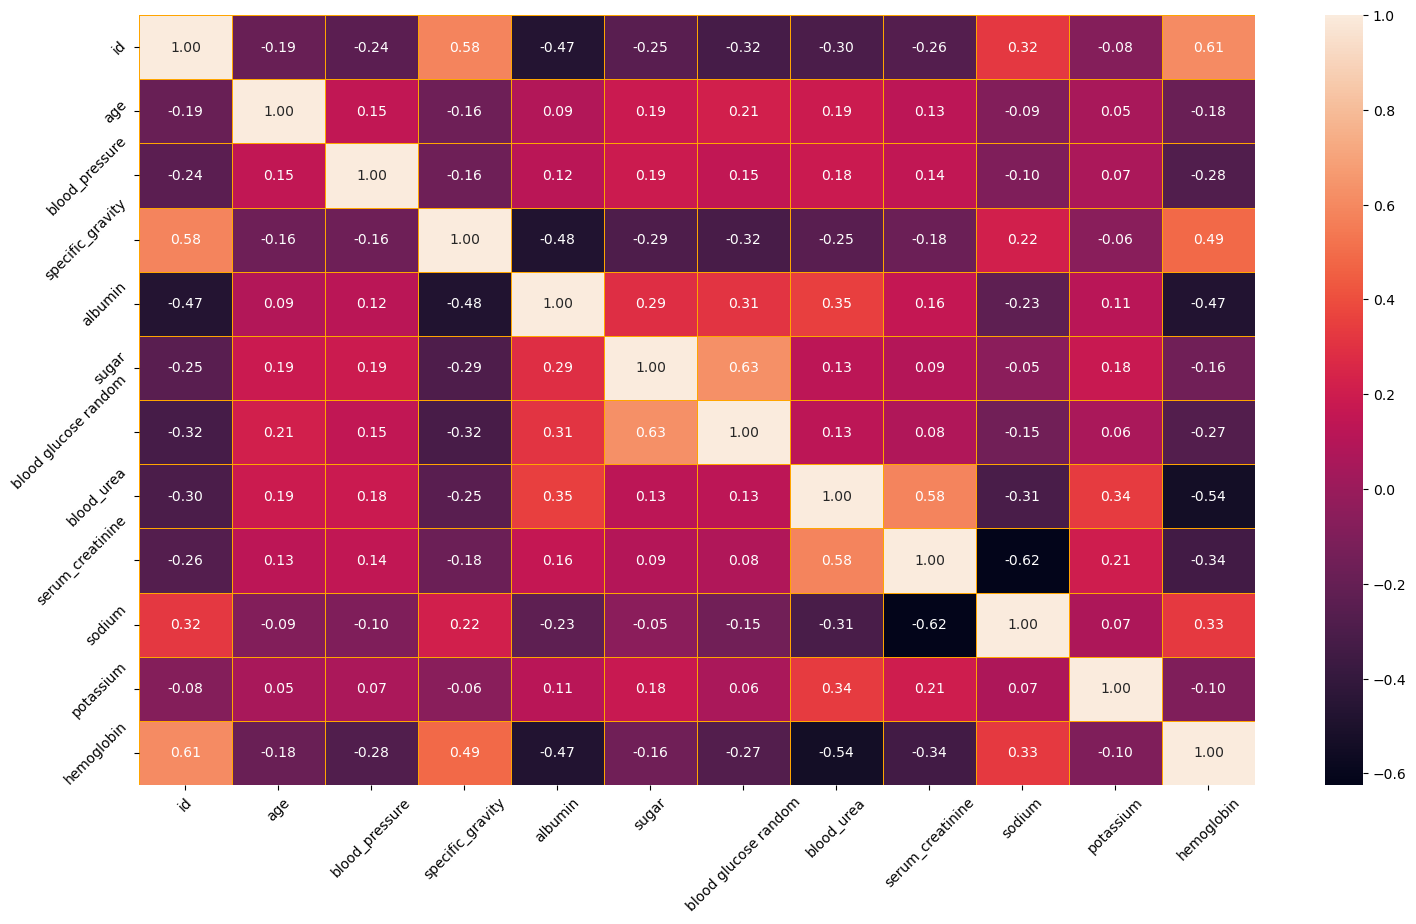

In [29]:
#HEAT MAP #correlation of parameters
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

<Axes: ylabel='count'>

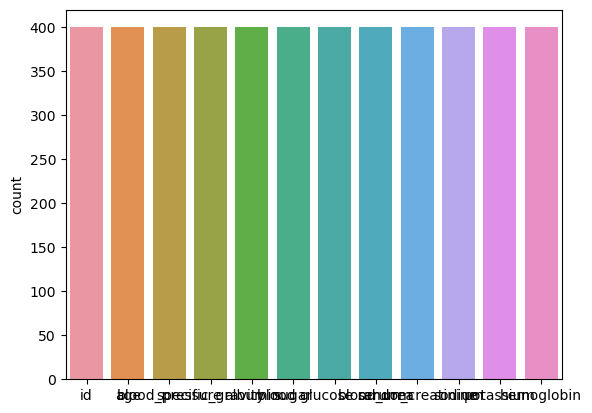

In [30]:
sns.countplot(data)

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xt = pd.get_dummies(data)
x_bal=sc.fit_transform(xt)

In [32]:
label = []

for x in y:
    if x == 'ckd':
        label.append(0)
    else:
        label.append(1)

In [33]:
selcols=['red_blood_cells','pus_cell','blood glucose random','blood_urea','pedal_edema','anemia','diabetesmellitusm','coronary_artery_disease']
# from sklearn.preprocessing import LabelEncoder
# Le = LabelEncoder()
# le.fit()
x=pd.DataFrame(x_bal)
# x=x.replace(np.nan,0)
y= np.array(label)

print(x.shape)
print(y.shape)

(400, 228)
(400,)


In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2) #train test split

In [35]:
# importing the keras libraries and packages
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
# Creating ANN skleton view

classification = Sequential()
classification.add(Dense(30,activation='relu'))
classification.add(Dense(128,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(32,activation='relu'))
classification.add(Dense(1,activation='sigmoid'))

In [37]:
#compiling the ANN model
classification.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
# Training the model
classification.fit(x_train,y_train,batch_size=10,validation_split=0.2,epochs=100)

Epoch 1/100
26/26 [==============================] - 7s 43ms/step - loss: 0.5212 - accuracy: 0.8164 - val_loss: 0.2894 - val_accuracy: 0.9688
Epoch 2/100
26/26 [==============================] - 0s 11ms/step - loss: 0.1607 - accuracy: 0.9805 - val_loss: 0.1067 - val_accuracy: 0.9844
Epoch 3/100
26/26 [==============================] - 0s 12ms/step - loss: 0.0347 - accuracy: 0.9961 - val_loss: 0.0654 - val_accuracy: 0.9531
Epoch 4/100
26/26 [==============================] - 0s 13ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0476 - val_accuracy: 0.9844
Epoch 5/100
26/26 [==============================] - 0s 12ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0420 - val_accuracy: 0.9688
Epoch 6/100
26/26 [==============================] - 0s 16ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0384 - val_accuracy: 0.9688
Epoch 7/100
26/26 [==============================] - 0s 15ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0365 - val_accuracy: 0.9688
Epoch 

26/26 [==============================] - 0s 11ms/step - loss: 1.2785e-05 - accuracy: 1.0000 - val_loss: 0.0251 - val_accuracy: 0.9844
Epoch 58/100
26/26 [==============================] - 0s 11ms/step - loss: 1.2282e-05 - accuracy: 1.0000 - val_loss: 0.0252 - val_accuracy: 0.9844
Epoch 59/100
26/26 [==============================] - 0s 10ms/step - loss: 1.1829e-05 - accuracy: 1.0000 - val_loss: 0.0251 - val_accuracy: 0.9844
Epoch 60/100
26/26 [==============================] - 0s 10ms/step - loss: 1.1394e-05 - accuracy: 1.0000 - val_loss: 0.0252 - val_accuracy: 0.9844
Epoch 61/100
26/26 [==============================] - 0s 11ms/step - loss: 1.0984e-05 - accuracy: 1.0000 - val_loss: 0.0252 - val_accuracy: 0.9844
Epoch 62/100
26/26 [==============================] - 0s 9ms/step - loss: 1.0591e-05 - accuracy: 1.0000 - val_loss: 0.0252 - val_accuracy: 0.9844
Epoch 63/100
26/26 [==============================] - 0s 8ms/step - loss: 1.0220e-05 - accuracy: 1.0000 - val_loss: 0.0252 - val_acc

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10, criterion='entropy')

In [40]:
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [41]:
Y_predict=rfc.predict(x_test)

In [42]:
y_predict_train=rfc.predict(x_train)

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [44]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [45]:
y_predict= dtc.predict(x_test)
y_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [46]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

LogisticRegression()

In [47]:
from sklearn.metrics import accuracy_score,classification_report
y_predict =lgr.predict

In [48]:
# logistic Regression
y_pred = lgr.predict(x_test)

print(y_pred)
(y_pred)

[0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 0]


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [49]:
# DecisionTree classifier
y_pred = dtc.predict(x_test)

print(y_pred)
(y_pred)

[0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 1 0]


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [50]:
# Random Forest classifier
y_pred = rfc.predict(x_test)

print(y_pred)
(y_pred)

[0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 0]


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [51]:
classification.save("ckd.h5")

In [52]:
# Testing the model
y_pred = classification.predict(x_test)

3/3 [==============================] - 0s 8ms/step


In [53]:
y_pred

array([[5.3190249e-03],
       [2.7675625e-08],
       [1.7214835e-07],
       [1.6966385e-05],
       [9.9998015e-01],
       [8.4991763e-07],
       [5.0781904e-07],
       [5.6602559e-11],
       [9.9999988e-01],
       [1.0589738e-08],
       [1.1849683e-07],
       [6.0558647e-05],
       [1.8000517e-04],
       [9.9999952e-01],
       [8.5076226e-06],
       [1.1729027e-06],
       [2.5042847e-05],
       [9.9999869e-01],
       [9.9999988e-01],
       [4.0780716e-07],
       [9.9832922e-01],
       [9.9999750e-01],
       [6.4068245e-06],
       [9.9999952e-01],
       [2.4139783e-05],
       [9.9999928e-01],
       [2.2427861e-10],
       [6.9121889e-08],
       [9.7801262e-01],
       [2.3619311e-01],
       [9.0005550e-08],
       [9.9999803e-01],
       [6.0046119e-08],
       [2.5076713e-05],
       [5.5645972e-07],
       [8.9686619e-06],
       [9.9999994e-01],
       [5.2837917e-04],
       [7.5807825e-06],
       [9.9999994e-01],
       [2.1242871e-04],
       [1.000000

In [54]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [

In [55]:
def predict_exit(sample_value):
    # convert list to numpy array
    sample_value = np.array(sample_value)
    
    #Rrshape because sample_value contains only 1 record
    sample_value = sample_value.reshape(1, -1)
    
    #Feature Scaling
    sample_value = sc.transform(sample_value)
    
    return classifier.predict(sample_value)

In [56]:
test=classification.predict([x_test[:1]])
if test==1:
    print('Prediction: High chance of CKD!')
else:
    print('Prediction: Low chance of CKD.')

1/1 [==============================] - 0s 266ms/step
Prediction: Low chance of CKD.


In [57]:
from sklearn.model_selection import KFold

In [58]:
dfs = []
models =[
         ('LogReg',LogisticRegression()),
         ('RF',RandomForestClassifier()),
         ('DecisionTree',DecisionTreeClassifier()),
       ]
results = []
names = []
scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted','roc_auc']
target_names = ['NO CKD','CKD']
for name, model in models:

    KFold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
    cv_results = model_selection.cross_validate(model, x_train, y_train, cv=KFold, scoring=scoring)
    clf = model.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names))
    results.append(cv_results)
    names.append(name)
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
final = pd.concat(dfs,ignore_index=True)
return final

NameError: name 'model_selection' is not defined

In [59]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(['y_test'],['y_pred'])
cm

array([[0, 0],
       [1, 0]], dtype=int64)

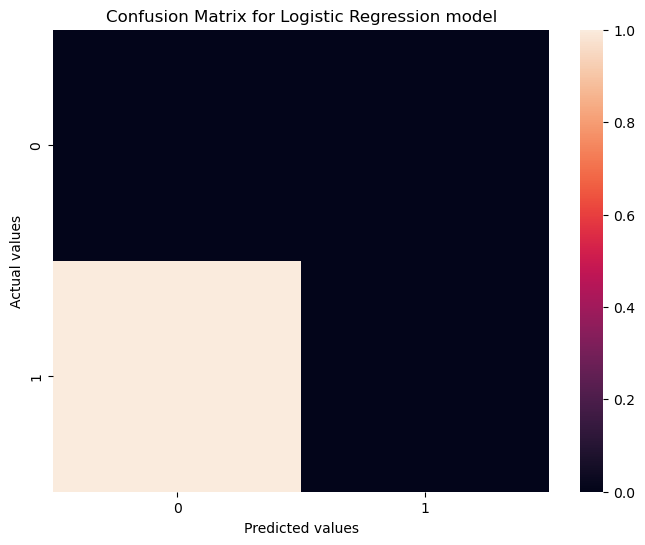

In [60]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression model')
plt.show()

In [61]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(['y_test'],['y_predict'])
cm

array([[0, 0],
       [1, 0]], dtype=int64)

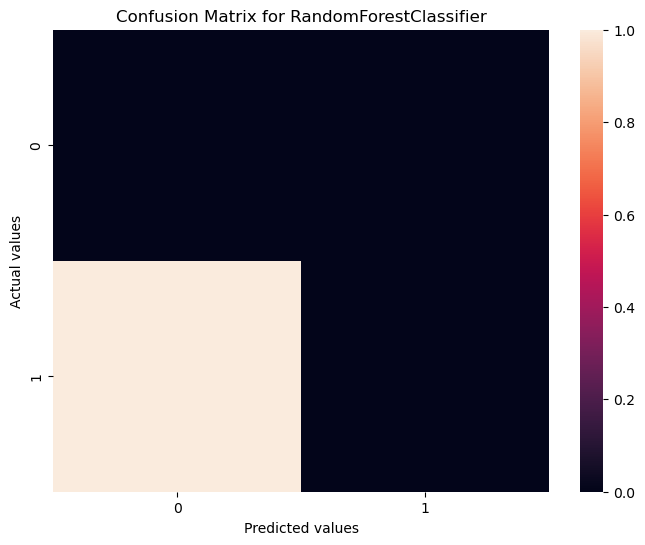

In [62]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [63]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(['y_test'],['y_predict'])
cm

array([[0, 0],
       [1, 0]], dtype=int64)

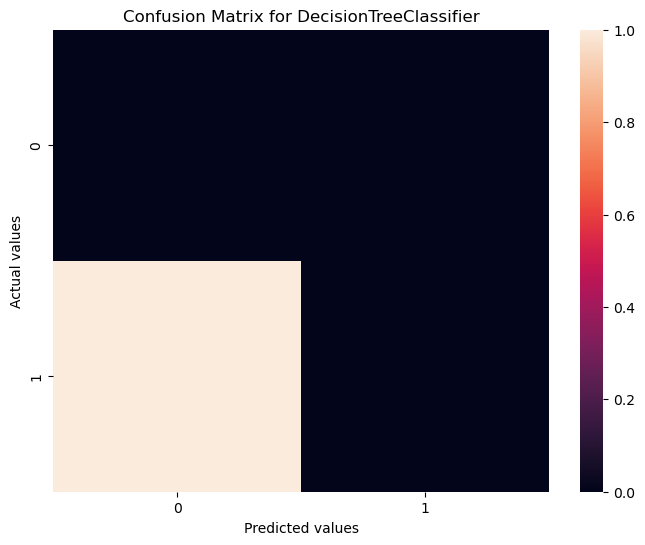

In [64]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      0.96      0.98        27

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [66]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(['y_test'],['y_predict'])
cm

array([[0, 0],
       [1, 0]], dtype=int64)

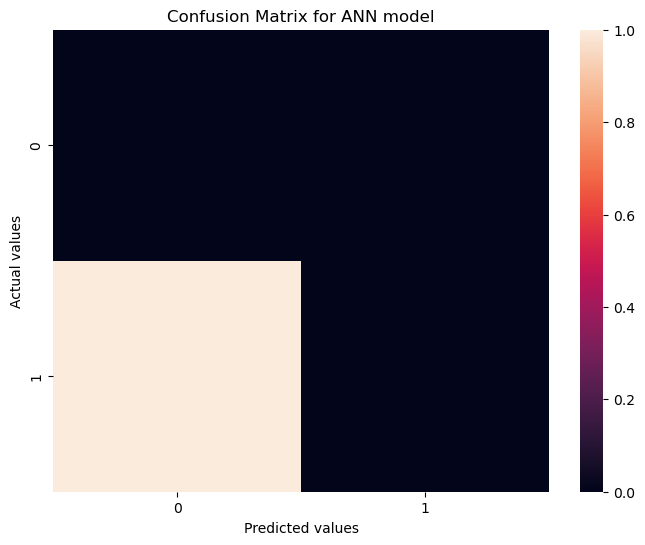

In [67]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

In [68]:
bootstraps = []
for model in list  (set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
    
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
result_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics',value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = result_long.loc[result_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = result_long.loc[result_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

NameError: name 'final' is not defined

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05,1),loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

NameError: name 'results_long_nofit' is not defined

<Figure size 2000x1200 with 0 Axes>

In [70]:
pickle.dump(lgr, open('CKD.pkl','wb'))

In [71]:

from flask import Flask, render_template, request
import numpy as np
import pickle
app = Flask(__name__) # initializing a flask app
model = pickle.load(open('CKD.pkl','rb')) #loading the model
@app.route('/') # route to display the home page
def home():
    return render_template('home.html') #rendering the home page
@app.route('/Prediction',methods=['POST','GET'])

def prediction():
    return render_template('indexnew.html')
@app.route('/Home',methods=['POST','GET'])
def my_home():
    return render_template('home.html')
@app.route('/predict',methods=['POST'])# route to show the prediction in a web UI
def predict():
    
    #reading the inputs given by the user
    input_features = [float(x) for x in request.form.values()]
    features_values = [np.array(input_features)]
    
    feature_name =['bu','bgr','ane','cad','pc','rbc','dm','pe']
    df=pd.DataFrame(feature_value, columns=features_name)
    
    # predictions using the loaded model file
    output = model.predict(df)
    return render_template('result.html',prediction_text=output)
if __name__ == '__main__':

    app.run(debug=True)
    


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
